In [6]:
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path 


## Step 1: Simulation Output 

In [7]:
with open('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/effect_sizes.pkl', 'rb') as f:
    effect_sizes = pickle.load(f)

In [8]:
effect_sizes

,position,site_id,effect_size,causal_allele,allele_freq,trait_id
0,443569,3155,0.399774,G,0.025,0
1,660266,4595,-0.905479,T,0.900,0
2,694308,4891,-0.378163,C,0.025,0
3,778077,5499,1.299228,C,0.050,0
4,878283,6186,-0.356264,C,0.025,0
...,...,...,...,...,...,...
95,9254836,66723,1.461444,G,0.325,0
96,9400915,67751,-1.107046,C,0.025,0
97,9671595,69695,-0.894727,C,0.025,0
98,9702024,69907,0.643327,C,0.825,0


In [9]:
with open('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/phenotype.pkl', 'rb') as f:
    phenotype = pickle.load(f)

In [10]:
phenotype

,trait_id,individual_id,population,genetic_value,environmental_noise,phenotype
0,0,0,YRI,1.149963,0.869750,2.019713
1,0,1,YRI,-3.512245,-2.968412,-6.480657
2,0,2,YRI,-1.912825,2.142003,0.229177
3,0,3,YRI,0.031193,2.684641,2.715834
4,0,4,YRI,4.456909,-5.568813,-1.111904
5,0,5,YRI,11.830988,-3.716793,8.114195
6,0,6,YRI,-2.973156,0.364893,-2.608263
7,0,7,YRI,4.256293,-0.902647,3.353646
8,0,8,YRI,5.829517,-0.047955,5.781561
9,0,9,YRI,2.755464,-2.434832,0.320633


In [11]:
import tskit
import numpy as np
import pandas as pd

# Load the tree sequence
ts = tskit.load('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/tree_sequence.trees')

print('Tree Sequence Information:')
print('=' * 70)
print(f'Sequence length: {ts.sequence_length:,.0f} bp')
print(f'Number of samples (haplotypes): {ts.num_samples}')
print(f'Number of individuals: {ts.num_individuals}')
print(f'Number of variant sites: {ts.num_sites}')
print(f'Number of mutations: {ts.num_mutations}')
print()

Tree Sequence Information:
Sequence length: 10,000,000 bp
Number of samples (haplotypes): 40
Number of individuals: 20
Number of variant sites: 72072
Number of mutations: 72330



In [12]:
# Extract genotype matrix
# Method 1: Get full genotype matrix (sites × samples)
print('Method 1: Full Genotype Matrix')
print('-' * 70)
genotypes = ts.genotype_matrix()
print(f'Shape: {genotypes.shape} (sites × samples/haplotypes)')
print(f'Data type: {genotypes.dtype}')
print()
print('First 5 sites, first 10 haplotypes:')
print(genotypes[:5, :10])
print()


Method 1: Full Genotype Matrix
----------------------------------------------------------------------
Shape: (72072, 40) (sites × samples/haplotypes)
Data type: int32

First 5 sites, first 10 haplotypes:
[[0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]]



In [13]:
# Method 2: Convert to individual-level genotypes (diploid)
# Sum pairs of haplotypes to get 0/1/2 genotypes
print('Method 2: Individual-level Genotypes (0/1/2)')
print('-' * 70)
# Reshape: each individual has 2 consecutive haplotypes
n_individuals = ts.num_individuals
individual_genotypes = genotypes[:, ::2] + genotypes[:, 1::2]
print(f'Shape: {individual_genotypes.shape} (sites × individuals)')
print()
print('First 5 sites, first 10 individuals:')
print(individual_genotypes[:5, :10])
print()

# Method 3: Get positions and alleles
print('Method 3: Variant Information')
print('-' * 70)
positions = []
ref_alleles = []
alt_alleles = []

for variant in ts.variants():
    positions.append(int(variant.site.position))
    ref_alleles.append(variant.alleles[0])
    alt_alleles.append(variant.alleles[1] if len(variant.alleles) > 1 else '.')

print(f'Total variants: {len(positions)}')
print()
print('First 10 variants:')
for i in range(min(10, len(positions))):
    print(f'  Position {positions[i]:8d}: {ref_alleles[i]} → {alt_alleles[i]}')
print()

# Method 4: Create a pandas DataFrame
print('Method 4: As Pandas DataFrame')
print('-' * 70)
# Create DataFrame with variant info
variant_df = pd.DataFrame({
    'position': positions,
    'ref': ref_alleles,
    'alt': alt_alleles
})

# Add genotypes as columns (one per individual)
for i in range(min(5, n_individuals)):  # Just first 5 individuals for display
    variant_df[f'ind_{i}'] = individual_genotypes[:, i]

print(variant_df.head(10))
print()

# Summary statistics
print('Genotype Summary:')
print('-' * 70)
print(f'Min genotype: {individual_genotypes.min()}')
print(f'Max genotype: {individual_genotypes.max()}')
print(f'Mean genotype: {individual_genotypes.mean():.3f}')
print(f'Proportion of sites with variation: {(individual_genotypes.sum(axis=1) > 0).mean():.3f}')

Method 2: Individual-level Genotypes (0/1/2)
----------------------------------------------------------------------
Shape: (72072, 20) (sites × individuals)

First 5 sites, first 10 individuals:
[[0 2 0 0 0 2 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 2]
 [1 0 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]

Method 3: Variant Information
----------------------------------------------------------------------
Total variants: 72072

First 10 variants:
  Position        3: T → C
  Position      218: T → C
  Position      258: G → A
  Position      653: G → A
  Position      731: T → G
  Position      895: G → C
  Position     1145: C → A
  Position     1310: C → A
  Position     1785: A → C
  Position     1876: T → C

Method 4: As Pandas DataFrame
----------------------------------------------------------------------
   position ref alt  ind_0  ind_1  ind_2  ind_3  ind_4
0         3   T   C      0      2      0      0      0
1       218   T   C      0      0      0      0      0
2       

In [14]:
individual_genotypes

array([[0, 2, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 2, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 2, ..., 2, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]], shape=(72072, 20), dtype=int32)

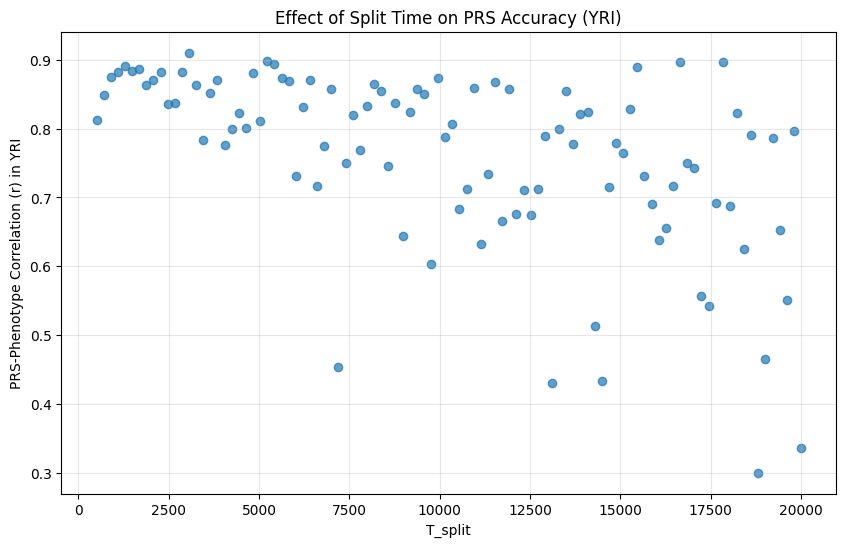

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Base directories
sim_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations')
gwas_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/gwas')

t_splits = []
r_values = []

# Iterate over simulation directories
# Assuming directories are named with integers
sim_dirs = sorted([d for d in sim_base.iterdir() if d.is_dir() and d.name.isdigit()], key=lambda x: int(x.name))

for sim_dir in sim_dirs:
    sid = sim_dir.name
    
    # Load T_split
    params_path = sim_dir / 'sampled_params.pkl'
    if not params_path.exists():
        continue
        
    with open(params_path, 'rb') as f:
        params = pickle.load(f)
        # Check for T_split key (could be T_split or t_split)
        t_split = params.get('T_split', params.get('t_split'))
        
    # Load PRS results for YRI
    prs_path = gwas_base / sid / 'gwas_prs_values_YRI.csv'
    if not prs_path.exists():
        print(f"PRS file not found for sim {sid}")
        continue
        
    df = pd.read_csv(prs_path)
    
    # Calculate correlation
    if len(df) > 1:
        r = df['PRS'].corr(df['phenotype'])
        
        t_splits.append(t_split)
        r_values.append(r)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(t_splits, r_values, alpha=0.7)
plt.xlabel('T_split')
plt.ylabel('PRS-Phenotype Correlation (r) in YRI')
plt.title('Effect of Split Time on PRS Accuracy (YRI)')
plt.grid(True, alpha=0.3)
plt.show()